<a href="https://colab.research.google.com/github/tuanlamdao/datascience/blob/master/8_More_Classifier_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Decision Tree Classifiers


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
cd 'drive/My Drive/Colab Notebooks'


/content/drive/My Drive/Colab Notebooks


In [7]:
from tuanlam import *

In [8]:
iris = datasets.load_iris()
(iris_train_ftrs, iris_test_ftrs, iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data, iris.target, test_size=.33, random_state=21)
useclass = 1
(iris_1c_train_ftrs, iris_1c_test_ftrs, iris_1c_train_tgt, iris_1c_test_tgt) = skms.train_test_split(iris.data, iris.target==useclass, test_size=.33, random_state = 21)

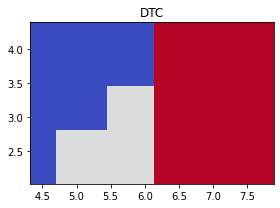

In [9]:
tree_classifiers = {'DTC': tree.DecisionTreeClassifier(max_depth=3)}
fig, ax = plt.subplots(1,1,figsize=(4,3))
for name, mod in tree_classifiers.items():
    plot_boundary(ax, iris.data, iris.target, mod,[0,1])
    ax.set_title(name)
plt.tight_layout()    

In [10]:
dtc = tree.DecisionTreeClassifier()
skms.cross_val_score(dtc, iris.data, iris.target, cv=3, scoring='accuracy')
iris_1c_tree = (tree.DecisionTreeClassifier().fit(iris_1c_train_ftrs, iris_1c_train_tgt))



In [11]:
!pip install pydotplus

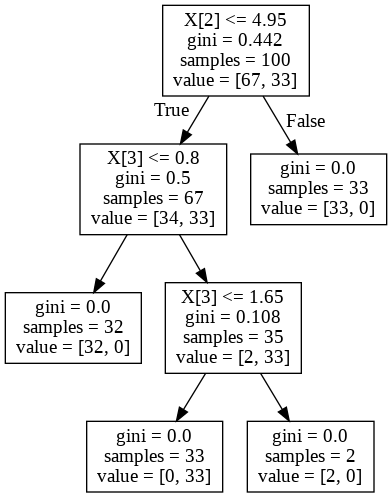

In [12]:
import pydotplus
dot_data = tree.export_graphviz(iris_1c_tree, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris_1c.png")
Image("iris_1c.png", width=75,height =75)

In [13]:
iris_tree = (tree.DecisionTreeClassifier().fit(iris_train_ftrs, iris_train_tgt))

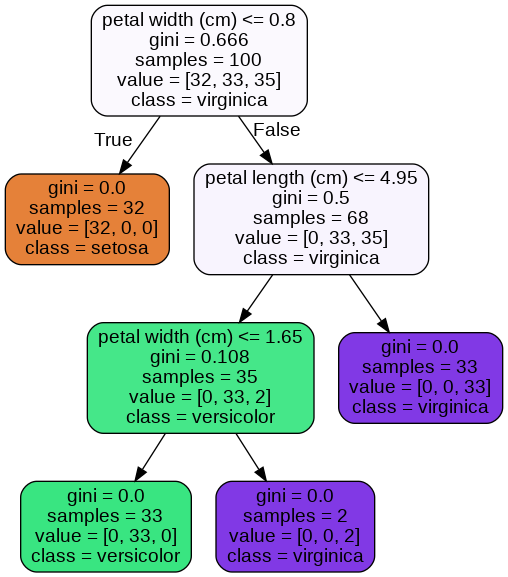

In [14]:
dot_data = tree.export_graphviz(iris_tree,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris.png")
Image("iris.png", width=140, height=140)

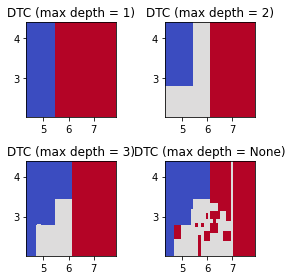

In [15]:
fig, axes = plt.subplots(2,2,figsize=(4,4))
depths = [1,2,3,None]
for depth,ax in zip(depths, axes.flat):
    dtc_model = tree.DecisionTreeClassifier(max_depth=depth)
    plot_boundary(ax,iris.data,iris.target,dtc_model,[0,1])
    ax.set_title("DTC (max depth = {})".format(dtc_model.max_depth))
plt.tight_layout()

##### Support Vector Classifiers

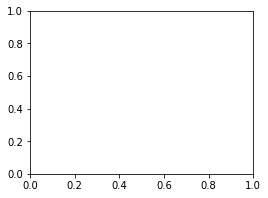

In [16]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
left = np.mgrid